In [1]:
# Importing only necessary librarys: matplotlib.pyplot to be able to make a graph and numpy to make an array 
import matplotlib.pyplot as plt
import numpy as np

#importing linear rgression functions
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures


You will Notice that in this Notebook I will use "np.random.seed(1337)".
I do this, so that you (corrector) see the same as me, but theoretically nothing should change.

This is especially important, because in science we want reproducable results and this way we ensure that.
Watch out, that anytime you use a randomizer algorythm it "evolves" the seed used so I will add this line 
throughout the different cells to ensure, that its reproducable even if cells are run different amount of times.

In the end I will run the whole code once with this commended out to make sure I haven't added any systematicall biases, that change the resut

# Creating Traing and Test Data

In [20]:
#reseting the seed (explained in first Markdown)
np.random.seed(1337)

#for this problem as "reality" I am using the cubic function from Exercise 1 Question 2
#defining the bins to use for all functions. Also initilize the linespace for the functions
bins = 1000
x = np.linspace(-5,8,bins)

#create array with gaus distributed points (mean=0, std=150, N = bins) 
noise = np.random.normal(0,150,bins)

#create "real" function to have a reference for later, what the actual data is like
realfunc = []
for num in range(bins):
    realfunc.append(7.2-3.1*x[num]+4.3*x[num]**3)

#create function with noise added onto it by itterating through noise array and appending it to f(x)
noisyfunc = []
for num, n in enumerate(noise):
    noisyfunc.append(7.2-3.1*x[num]+4.3*x[num]**3 + n)
    
#create new array with gaus distributed points (mean=0, std=150, N = bins) for the testfunction
noise2 = np.random.normal(0,150,bins)

#create function with noise added onto it by itterating through noise array and appending it to f(x)
testfunc = []
for num, n in enumerate(noise2):
    testfunc.append(7.2-3.1*x[num]+4.3*x[num]**3 + n)


'''
#IF YOU WANT TO PLOT THE FUNCTIONS TO SEE THEM COMMENT OUT THE THREE COTATIONS MARK ABOVE THIS LINE
    
#use matplotlib to plot function and label it
plt.plot(x,noisyfunc)
plt.plot(x,testfunc)
plt.plot(x,realfunc)

plt.xlabel("x")
plt.ylabel("y")
plt.title("f(x) (orange) and f(x) with noise (Blue)")


#this next step is not necessary in jupyter notebooks, but is good form if you want to translate to "normal" python3
plt.show()

#'''
#Ignore this: clearing jupyter output form '''''' lines 
print("")

# Creating cost function 
I will make it calculate the distance of a given input from the test/training set

Watch out, that the cost function takes the value to compare and a corresponding b-value, which is something like the x-value of the function at the point you want to compare, that lives in the linespace of x. (b is vor bin_value) 
For example b = 0 corresponds to x = -5 and b = number of bins correspnds to x = 8

In [21]:
def cost(f_b,b,trainig = True):
    #check if value passed is in the range of the problem:
    if ((b > bins) or (b < 0)):
        return "array noisyfinc doesent have the index" + str(b)
    #return the difference of the given value from the traing/test set:
    if(trainig):
        return (f_b-noisyfunc[b])**2
    elif(not trainig):
        return (f_b-testfunc[b])**2

# Training a third degree Polynomial on the training set for different amount of bins
The actual regression code has been used several times now. To see how it works fo to the last Problem set. I will keep the comments to a minimum when it comes to that.

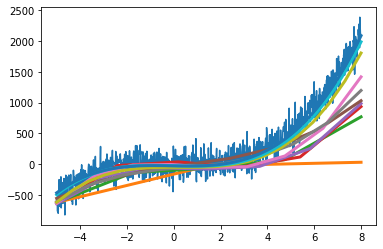

In [42]:
clf = linear_model.LinearRegression()


# Train the model using the training sets
clf.fit(x.reshape((len(x),1)), noisyfunc)
xplot=np.linspace(-5,8,bins)

#These are the different amounts of data I want to use to investigate the first question:
training_bins = (3,5,6,7,8,9,10,20,50,100)

#these are lists of Errors for the different bins im testing
Err_in = []
Err_out = []

plt.plot(x,noisyfunc)

for tr_bins in training_bins:
    #making a new linespace and picking out those values from the training data
    x_new = np.linspace(-5,8,tr_bins)
    noisyfunc_new = []
    for num, xn in enumerate(x_new):
        noisyfunc_new.append(noisyfunc[int((num)*(bins/tr_bins))])
    
    clf.fit(x_new.reshape((len(x_new),1)), noisyfunc_new)
    
    #simple training as in last exercise:
    poly3 = PolynomialFeatures(degree=3)
    X3 = poly3.fit_transform(x_new[:,np.newaxis])
    clf3 = linear_model.LinearRegression()
    clf3.fit(X3,noisyfunc_new)

    X3plot=poly3.fit_transform(x_new.reshape((len(x_new),1)))
    poly3_plot=plt.plot(x_new, clf3.predict(X3plot), label='Poly 3',linewidth=3)

    # Grabing out the calculated fir and creating an array from it with the right amount of bins:
    predictedfunc = clf3.predict(X3plot)

    #Calculate the in and out of sample Error for this fit
    Error_in = 0
    for i in range(tr_bins):
        Error_in += cost(predictedfunc[i],i)
    Error_in /= tr_bins
    Err_in.append(Error_in)

    Error_out = 0
    for i in range(tr_bins):
        Error_out += cost(predictedfunc[i],i,False)
    Error_out /= tr_bins
    Err_out.append(Error_out)

# Plot The Errors vs the amount of data used

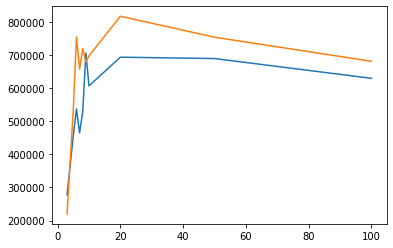

In [23]:
plt.plot(training_bins,Err_out)
plt.plot(training_bins,Err_in)

-620.2780964793616


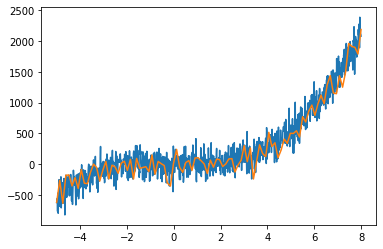

In [34]:
tr_bins = 100
x_new = np.linspace(-5,8,tr_bins)
noisyfunc_new = []
for num, xn in enumerate(x_new):
    noisyfunc_new.append(noisyfunc[int((num)*(bins/tr_bins))])

plt.plot(x,noisyfunc)
plt.plot(x_new,noisyfunc_new)
print(noisyfunc[0])

In [36]:
print(x_new)

[-5.         -4.86868687 -4.73737374 -4.60606061 -4.47474747 -4.34343434
 -4.21212121 -4.08080808 -3.94949495 -3.81818182 -3.68686869 -3.55555556
 -3.42424242 -3.29292929 -3.16161616 -3.03030303 -2.8989899  -2.76767677
 -2.63636364 -2.50505051 -2.37373737 -2.24242424 -2.11111111 -1.97979798
 -1.84848485 -1.71717172 -1.58585859 -1.45454545 -1.32323232 -1.19191919
 -1.06060606 -0.92929293 -0.7979798  -0.66666667 -0.53535354 -0.4040404
 -0.27272727 -0.14141414 -0.01010101  0.12121212  0.25252525  0.38383838
  0.51515152  0.64646465  0.77777778  0.90909091  1.04040404  1.17171717
  1.3030303   1.43434343  1.56565657  1.6969697   1.82828283  1.95959596
  2.09090909  2.22222222  2.35353535  2.48484848  2.61616162  2.74747475
  2.87878788  3.01010101  3.14141414  3.27272727  3.4040404   3.53535354
  3.66666667  3.7979798   3.92929293  4.06060606  4.19191919  4.32323232
  4.45454545  4.58585859  4.71717172  4.84848485  4.97979798  5.11111111
  5.24242424  5.37373737  5.50505051  5.63636364  5.

In [40]:
len(x_new)*bins/tr_bins

1000.0

In [38]:
len(x_new)

100